<a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

# BackPropagation

Estimated time needed: **30** mins


Backpropagation is the key algorithm used for training neural networks, allowing them to learn from data. It is based on the gradient descent optimization technique and works by iteratively adjusting the weights and biases of the network to minimize the error between the predicted and actual outputs.
 In this lab, we will create a neural network to implement backpropagation for a XOR problem.


# Objective for this notebook

* Train a Neural Network to Solve the XOR Problem
* Implement Backpropagation for Neural Network Training
* Demonstrate the Use of Activation Functions
* Understand the Learning Process Over Multiple Epochs
* Demonstrate Weight and Bias Adjustments via Gradient Descent
* Evaluate the Model's Performance After Training
* Monitor and Analyze the Training Process


<h2>Table of Contents</h2>


<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 4>
1. <a href="#Import-Required-Libraries">Import Required Libraries</a><br>
2. <a href="#Initialize-Inputs">Initialize Inputs</a><br>
3. <a href="#Declare-the-network-parameters">Declare the network parameters</a><br>
4. <a href="#Define-the-weights">Define the weights</a><br>  
5. <a href="#Training-the-Neural-Network">Training the Neural Network</a><br>  
6. <a href="#Testing-the-Network">Testing the Network</a><br>  
7. <a href="#Plot-the-error">Plot the error</a><br>  

</font>
</div>


In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g., your desktop, you may need to uncomment and install certain libraries.

!pip show numpy
!pip show matplotlib

Name: numpy
Version: 2.2.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are
 met:

     * Redistributions of source code must retain the above copyright
        notice, this list of conditions and the following disclaimer.

     * Redistributions in binary form must reproduce the above
        copyright notice, this list of conditions and the following
        disclaimer in the documentation and/or other materials provided
        with the distribution.

     * Neither the name of the NumPy Developers nor the names of any
        contributors may be used to endorse or promote products derived
        from this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED

## Import Required Libraries


In [3]:
# Importing the required library
import numpy as np
import matplotlib.pyplot as plt

## Initialize Inputs
Define the input and expected output for a XOR gate problem


In [4]:
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Declare the network parameters & the weights

Define the network parameters such as
1. number of input neurons
2. hidden layer neurons
3. output neurons
4. learning rate
5. number of epochs

Also, Declare the weights for the neurons. The initial weights are taken as random numbers which are then optimized by the backpropagation algorithm inside a function parameter `initialize_network_parameters()`


In [5]:
def initialize_network_parameters():
    # Network parameters
    inputSize = 2      # Number of input neurons (x1, x2)
    hiddenSize = 2     # Number of hidden neurons
    outputSize = 1     # Number of output neurons
    lr = 0.1           # Learning rate
    epochs = 180000    # Number of training epochs

    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Weights from hidden to output layer
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs


## Training the Neural Network

The neural network works in 5 stages: 
1. Forward pass
    * The input **X** is multiplied by the weights **w1** and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
    * The output of the hidden layer is then passed through the second set of weights **w2** to compute the final output. Again, a sigmoid activation function is used to generate the final output **a2**.
    
2. Error calculation
    * The error is computed as the difference between the expected output **(d)** and the actual output **(a2)**.
3. Backward pass
    * **Output Layer**: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer **(da2)**. This is used to calculate how much the weights in the output layer need to be adjusted.
    * **Hidden Layer**: The error is then propagated backward to the hidden layer. The gradient at the hidden layer **(da1)** is computed by taking the dot product of the transpose of the weights **(w2.T)** and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
4. Weights and bias updates
    * After computing the **gradients (dz1, dz2)**, the **weights (w1, w2)** and **biases (b1, b2)** are updated using the **learning rate (lr)** and **the gradients**. The updates are done to minimize the error and improve the model’s predictions.
5. Training:
    * This entire process is repeated over many iterations **(epochs)**. During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function.
Forward Pass:



In [6]:
# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.05847
Epoch: 19999, Average error: 0.03122
Epoch: 29999, Average error: 0.02356
Epoch: 39999, Average error: 0.01963
Epoch: 49999, Average error: 0.01715
Epoch: 59999, Average error: 0.01541
Epoch: 69999, Average error: 0.01410
Epoch: 79999, Average error: 0.01307
Epoch: 89999, Average error: 0.01224
Epoch: 99999, Average error: 0.01154
Epoch: 109999, Average error: 0.01095
Epoch: 119999, Average error: 0.01045
Epoch: 129999, Average error: 0.01000
Epoch: 139999, Average error: 0.00961
Epoch: 149999, Average error: 0.00926
Epoch: 159999, Average error: 0.00894
Epoch: 169999, Average error: 0.00865
Epoch: 179999, Average error: 0.00839


## Testing the Network
After training, you can now test the neural network to verify that it has learned the XOR function and outputs the correct values close to [0, 1, 1, 0]


In [7]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))



Final output after training: [[0.00844139 0.99035023 0.99204021 0.00752448]]
Ground truth [0 1 1 0]
Error after training: [[-0.00844142  0.0096498   0.00795981 -0.0075245 ]]
Average error: 0.00839


## Plot the error
Here, we plot the error as a function of epochs. This shows how error changed over multiple iterations of forward and backward passes and how the network learnt over time


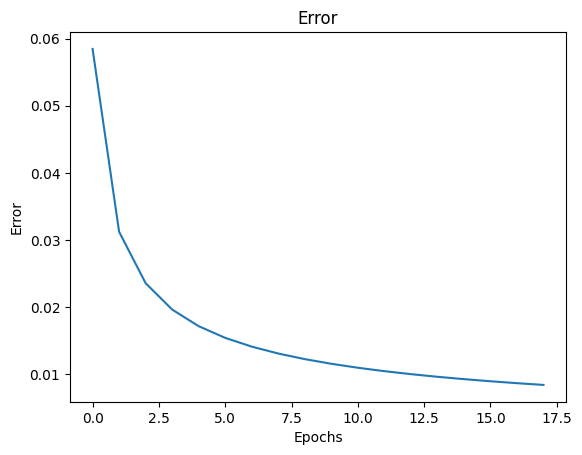

In [8]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Practice exercise 1


Implement backpropagation for **AND problem** using similar input as used for XOR problem above and plot the error


Epoch: 9999, Average error: 0.05225
Epoch: 19999, Average error: 0.03032
Epoch: 29999, Average error: 0.02327
Epoch: 39999, Average error: 0.01952
Epoch: 49999, Average error: 0.01712
Epoch: 59999, Average error: 0.01542
Epoch: 69999, Average error: 0.01413
Epoch: 79999, Average error: 0.01312
Epoch: 89999, Average error: 0.01229
Epoch: 99999, Average error: 0.01160
Epoch: 109999, Average error: 0.01101
Epoch: 119999, Average error: 0.01050
Epoch: 129999, Average error: 0.01006
Epoch: 139999, Average error: 0.00967
Epoch: 149999, Average error: 0.00931
Epoch: 159999, Average error: 0.00900
Epoch: 169999, Average error: 0.00871
Epoch: 179999, Average error: 0.00845

Final output after training: [[0.99051534 0.00803024 0.00805136 0.99176265]]
Ground truth [1 0 0 1]
Error after training: [[ 0.00948468 -0.00803026 -0.00805139  0.00823737]]
Average error: 0.00845


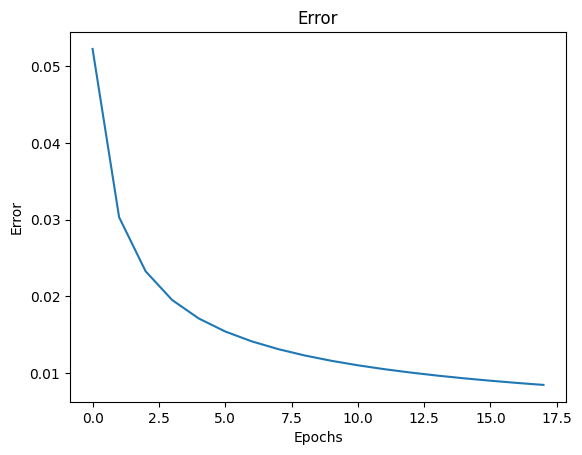

In [12]:
# Write your code here
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([1, 0, 0, 1])  # Expected output for AND

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

Double-click <b>here</b> for the solution.

<!-- Your answer is below:


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


-->


# Practice exercise 2


Now, decrease the learning rate to 0.01 and increase the number of epochs to 1000000 and check the error for XOR gate


Epoch: 9999, Average error: 0.16021
Epoch: 19999, Average error: 0.07785
Epoch: 29999, Average error: 0.05366
Epoch: 39999, Average error: 0.04232
Epoch: 49999, Average error: 0.03563
Epoch: 59999, Average error: 0.03116
Epoch: 69999, Average error: 0.02793
Epoch: 79999, Average error: 0.02547
Epoch: 89999, Average error: 0.02352
Epoch: 99999, Average error: 0.02193
Epoch: 109999, Average error: 0.02060
Epoch: 119999, Average error: 0.01948
Epoch: 129999, Average error: 0.01851
Epoch: 139999, Average error: 0.01766
Epoch: 149999, Average error: 0.01691
Epoch: 159999, Average error: 0.01624
Epoch: 169999, Average error: 0.01565
Epoch: 179999, Average error: 0.01511
Epoch: 189999, Average error: 0.01461
Epoch: 199999, Average error: 0.01416
Epoch: 209999, Average error: 0.01375
Epoch: 219999, Average error: 0.01337
Epoch: 229999, Average error: 0.01302
Epoch: 239999, Average error: 0.01269
Epoch: 249999, Average error: 0.01239
Epoch: 259999, Average error: 0.01210
Epoch: 269999, Average 

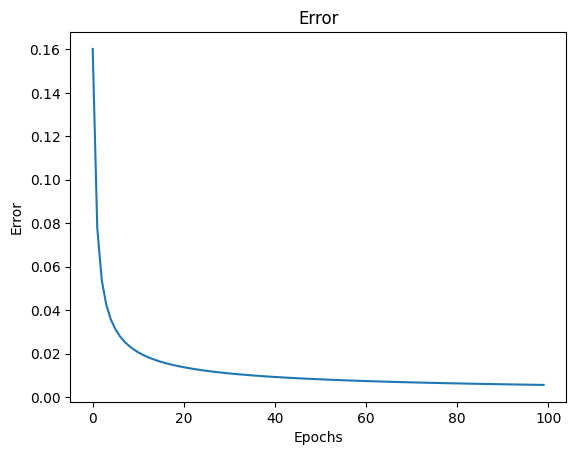

In [14]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
def initialize_network_parameters():
    # Network parameters
    inputSize = 2      # Number of input neurons (x1, x2)
    hiddenSize = 2     # Number of hidden neurons
    outputSize = 1     # Number of output neurons
    lr = 0.01           # Learning rate
    epochs = 1000000    # Number of training epochs

    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Weights from hidden to output layer
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs

d = np.array([0, 0, 0, 1])  # Expected output for AND

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


Double-click <b>here</b> for the solution.

<!-- Your answer is below:

lr = 0.01         # Learning rate
epochs = 1000000   # Number of training epochs


# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()


-->


## Thank you for completing this lab!

This notebook was created by [Aman Aggarwal](https://www.linkedin.com/in/aggarwal-aman/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!


Epoch: 9999, Average error: 0.24788
Epoch: 19999, Average error: 0.09526
Epoch: 29999, Average error: 0.05921
Epoch: 39999, Average error: 0.04480
Epoch: 49999, Average error: 0.03692
Epoch: 59999, Average error: 0.03189
Epoch: 69999, Average error: 0.02834
Epoch: 79999, Average error: 0.02570
Epoch: 89999, Average error: 0.02363
Epoch: 99999, Average error: 0.02196
Epoch: 109999, Average error: 0.02058
Epoch: 119999, Average error: 0.01941
Epoch: 129999, Average error: 0.01841
Epoch: 139999, Average error: 0.01754
Epoch: 149999, Average error: 0.01678
Epoch: 159999, Average error: 0.01610
Epoch: 169999, Average error: 0.01549
Epoch: 179999, Average error: 0.01495
Epoch: 189999, Average error: 0.01445
Epoch: 199999, Average error: 0.01400
Epoch: 209999, Average error: 0.01358
Epoch: 219999, Average error: 0.01320
Epoch: 229999, Average error: 0.01285
Epoch: 239999, Average error: 0.01252
Epoch: 249999, Average error: 0.01221
Epoch: 259999, Average error: 0.01193
Epoch: 269999, Average 

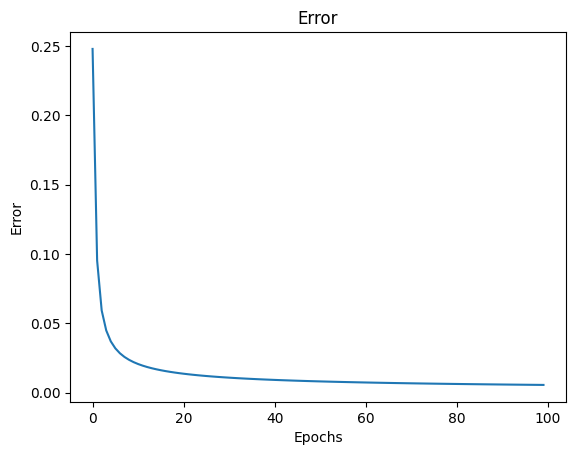

In [15]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
def initialize_network_parameters():
    # Network parameters
    inputSize = 2      # Number of input neurons (x1, x2)
    hiddenSize = 2     # Number of hidden neurons
    outputSize = 1     # Number of output neurons
    lr = 0.01           # Learning rate
    epochs = 1000000    # Number of training epochs

    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Weights from hidden to output layer
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs

d = np.array([0, 0, 0, 1])  # Expected output for AND

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()



<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2024-11-20  | 1.0  | Aman  |  Created the lab |
<hr>

## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>


## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
